<a href="https://colab.research.google.com/github/Muyiiwaa/learn-EDA/blob/master/DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
data = px.data.gapminder()

In [34]:
data.head()

,country,continent,year,lifexp,pop,gdp,iso_alpha,iso_num,remark
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,poor
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,poor
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,poor
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,poor
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,poor


In [4]:
data.rename(columns = {
    'lifeExp':'lifexp',
    'gdpPercap':'gdp'
}, inplace = True)

### BAR CHARTS

Text(0, 0.5, 'average life expectancy')

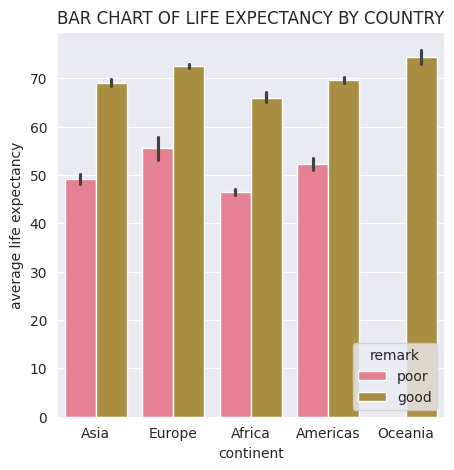

In [40]:
# seaborn
fig = plt.figure(figsize= (5,5))
plt.title('BAR CHART OF LIFE EXPECTANCY BY COUNTRY')
sns.barplot(data = data, x = 'continent', y = 'lifexp', estimator = 'mean', hue = 'remark')
plt.ylabel('average life expectancy')

In [28]:
# plotly
data_cont = data[['continent','lifexp']].groupby(['continent']).sum()
data_cont.reset_index(inplace = True)
px.bar(data_frame = data_cont, x = 'continent', y = 'lifexp',color_discrete_sequence=['darkred'])

In [38]:
px.histogram(data_frame = data, x = 'continent', y = 'lifexp',
             title = 'LIFE EXPECTANCY BY CONTINENT',
             width = 800, height = 500, color = 'remark',histfunc = 'avg', barmode = 'group')

<Axes: xlabel='lifexp', ylabel='gdp'>

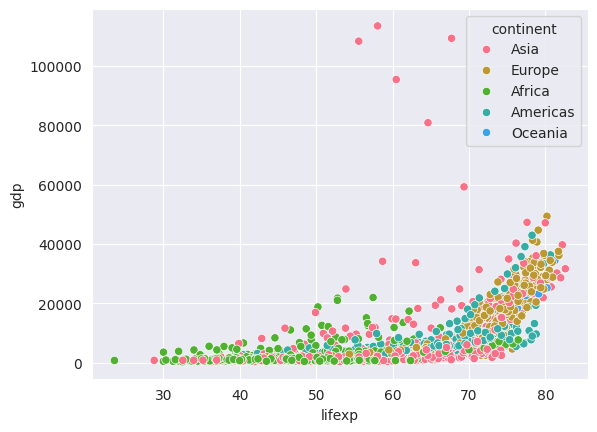

In [24]:
# scatter plot

sns.scatterplot(data = data, x = 'lifexp', y = 'gdp', hue = 'continent')

In [27]:
# plotly

px.scatter(data_frame=data, x = 'lifexp', y = 'gdp', color = 'continent')

In [32]:
data['lifexp'].describe()

count    1704.000000
mean       59.474439
std        12.917107
min        23.599000
25%        48.198000
50%        60.712500
75%        70.845500
max        82.603000
Name: lifexp, dtype: float64

In [33]:
data['remark'] = ['poor' if x < 60 else 'good' for x in data['lifexp']]

## PIE CHART

Text(0.5, 1.0, 'PIE CHART OF CONTINENT BY LIFE EXPECTANCY')

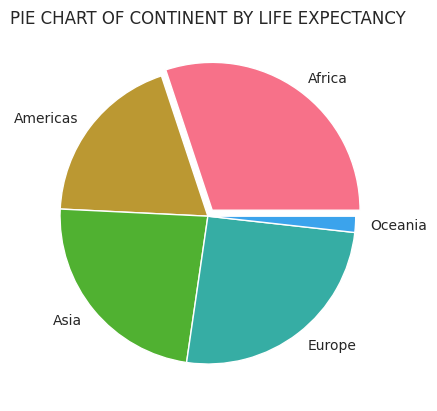

In [49]:
# matplotlib

data_cont = data[['continent','lifexp']].groupby(['continent']).sum()
data_cont.reset_index(inplace = True)
plt.pie(data = data_cont, x = 'lifexp', labels='continent', explode= [0.05,0,0,0,0])
plt.title('PIE CHART OF CONTINENT BY LIFE EXPECTANCY')

In [52]:
# plotly

px.pie(data_frame = data_cont, values = 'lifexp', labels = 'continent', names = 'continent')

## DISTRIBUTION PLOTS

1. HISTOGRAM
2. BOX PLOT
3. VIOLIN PLOT

<Axes: xlabel='lifexp', ylabel='Count'>

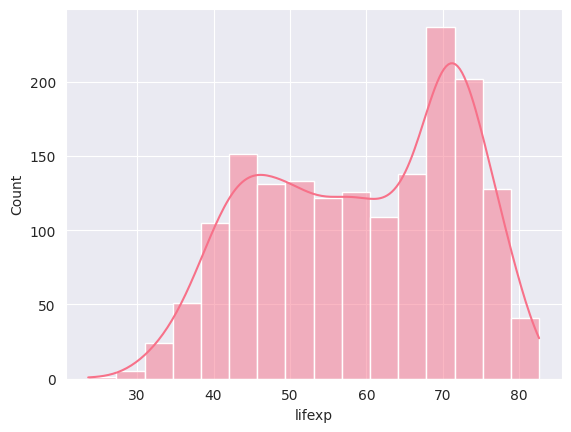

In [54]:
# SEABORN

sns.histplot(data= data, x = 'lifexp', kde=True)

<ipython-input-56-2d8c2fa95f13>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='lifexp', ylabel='Density'>

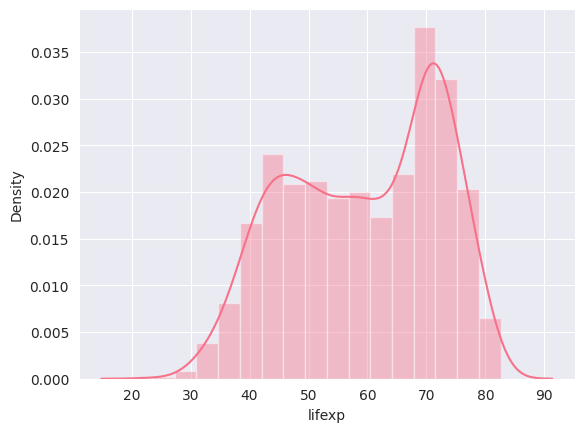

In [56]:
sns.distplot(a = data['lifexp'])

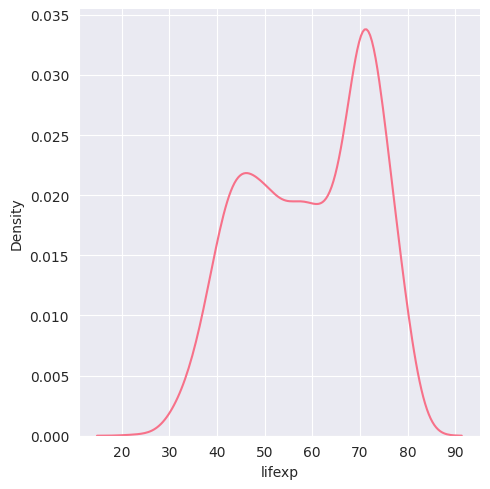

In [62]:
sns.displot(data = data, x = 'lifexp', kind = 'kde')

In [74]:
# plotly
px.histogram(data_frame = data, x = 'lifexp',marginal = 'box')

<Axes: xlabel='gdp'>

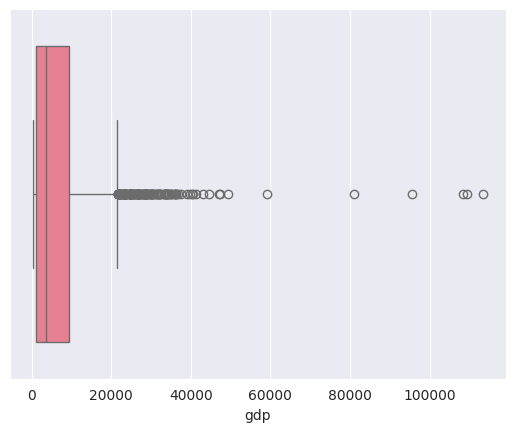

In [69]:
# box plot

sns.boxplot(data= data, x = 'gdp')

<Axes: xlabel='continent', ylabel='gdp'>

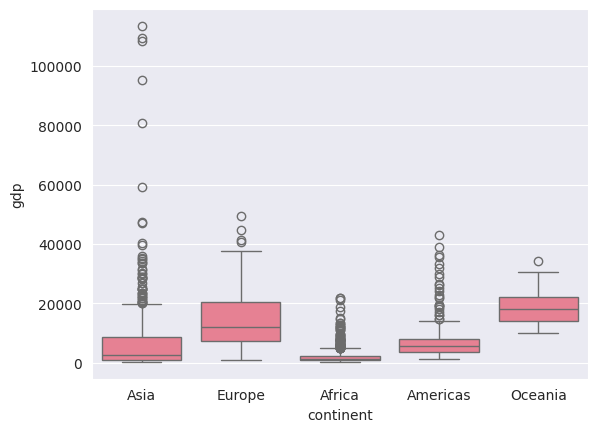

In [70]:
sns.boxplot(data= data, x = 'continent', y = 'gdp')

In [71]:
# plotly

px.box(data_frame = data, x = 'continent', y = 'gdp', color = 'continent')

In [75]:
px.violin(data_frame = data, x = 'continent', y = 'gdp', color = 'continent')

In [76]:
data.head()

,country,continent,year,lifexp,pop,gdp,iso_alpha,iso_num,remark
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,poor
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,poor
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,poor
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,poor
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,poor


### SUBPLOTS

Text(0.5, 0.98, 'OVERALL TITLE')

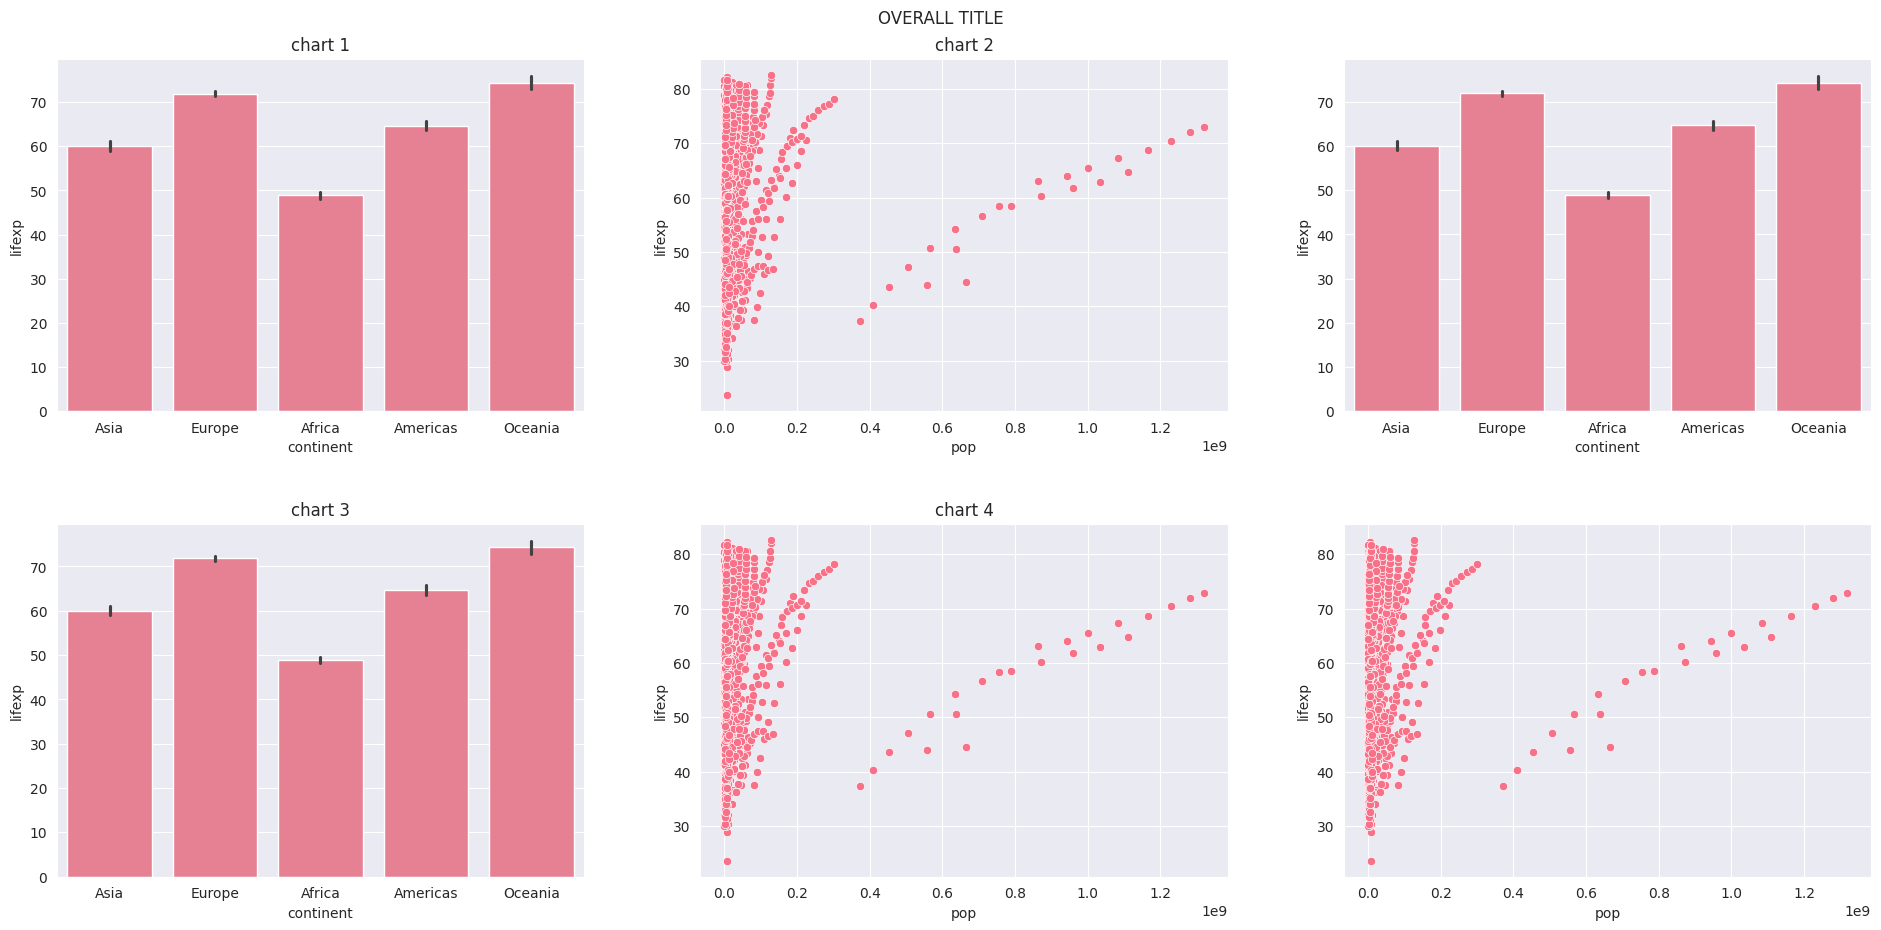

In [87]:
fig,axes = plt.subplots(2,3, figsize = (20, 10))
sns.barplot(data = data, x = 'continent', y = 'lifexp', ax = axes[0,0])
sns.scatterplot(data = data, x = 'pop', y = 'lifexp', ax = axes[0,1])
sns.barplot(data = data, x = 'continent', y = 'lifexp', ax = axes[1,0])
sns.scatterplot(data = data, x = 'pop', y = 'lifexp', ax = axes[1,1])
sns.barplot(data = data, x = 'continent', y = 'lifexp', ax = axes[0,2])
sns.scatterplot(data = data, x = 'pop', y = 'lifexp', ax = axes[1,2])

fig.tight_layout(pad= 5)
axes[0,0].set_title('chart 1')
axes[0,1].set_title('chart 2')
axes[1,0].set_title('chart 3')
axes[1,1].set_title('chart 4')
plt.suptitle('OVERALL TITLE')